In [1]:
#Veri seti linki : https://www.kaggle.com/datasets/usdot/flight-delays

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier


# Görselleştirme ayarları
%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [3]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/flights.csv'
path_airports = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/airports.csv'
path_airlines = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/airlines.csv'


In [4]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [5]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


# airports veri analizi

In [6]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [8]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [10]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [11]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


# airlines veri analizi


In [12]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [13]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [14]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [15]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [16]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [17]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


# flights veri analizi

In [18]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [19]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [20]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [21]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [22]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [25]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'] = X_train[col + '_ENCODED'].fillna(global_mean)
        X_test[col + '_ENCODED']  = X_test[col + '_ENCODED'].fillna(global_mean)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [26]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/flights.csv'
path_airports = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/airports.csv'
path_airlines = r'C:/Users/user/Desktop/ZekeriyaDenizUgurlu_22040101034_VeriMadenciligi/DataSet/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


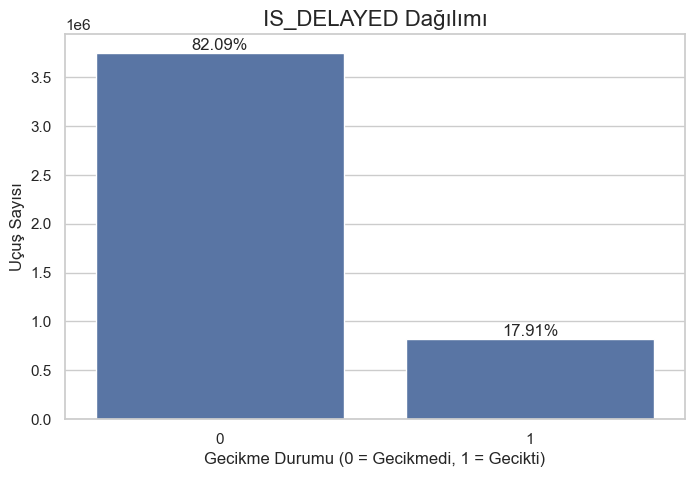


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


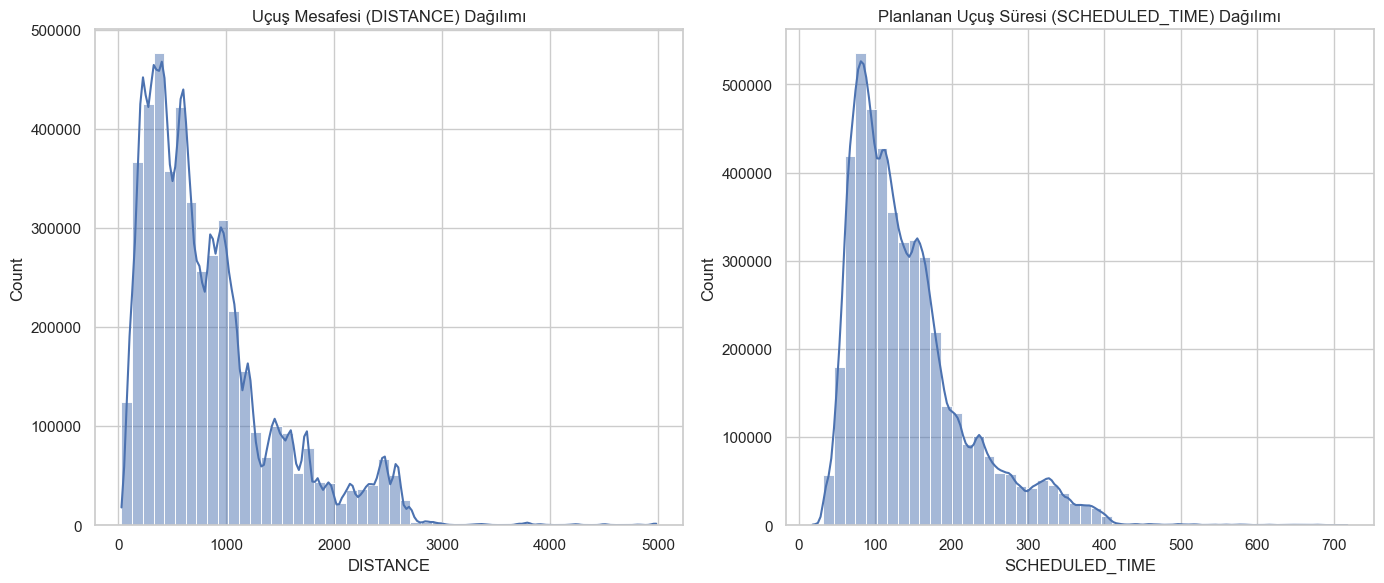


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


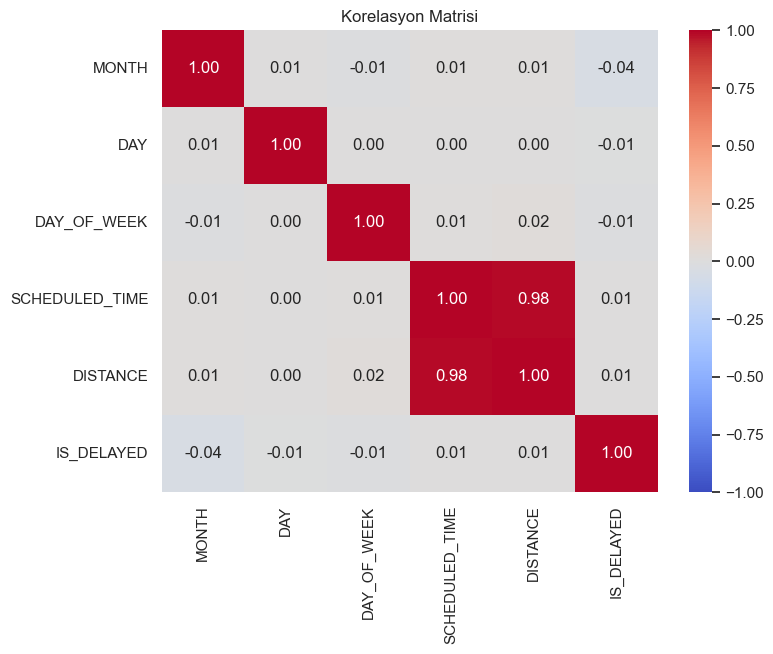

In [27]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # Korelasyon

    # numeric_features değişkenini otomatik oluştur
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Eğer hedef sütun listede ise çıkar
    if 'IS_DELAYED' in numeric_features:
        numeric_features.remove('IS_DELAYED')
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].dropna().corr()    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [28]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

if 'X_train_encoded' in locals() and 'y_test' in locals():
    print("BASELINE MODEL-1 : DecisionTreeClassifier")

    dt_model = DecisionTreeClassifier(
        max_depth=10,        #ezberlemeyi önler     
        class_weight='balanced',   #veri setimiz dengesiz olduğu için gecikmeyi daha iyi yakalasın diye dengeli yapıyoruz
        random_state=42
    )

    
    print("DecisionTreeClassifier model eğitimi başladı.")
    dt_model.fit(X_train_encoded, y_train)

    
    print("Tahmin yapılıyor.")
    y_pred_dt = dt_model.predict(X_test_encoded)
    
    #AUC metriği için olasılık hesaplama
    y_proba_dt = dt_model.predict_proba(X_test_encoded)[:, 1]

    # 4. Sonuçları Değerlendirme
    print(f"DecisionTreeClassifier model test sonucu accuracy değeri: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")
    
    print("DecisionTreeClassifier model sınıflandırma raporu:")
    print(classification_report(y_test, y_pred_dt, zero_division=0))
    print(f"DecisionTreeClassifier AUC-ROC skoru: {roc_auc_score(y_test, y_proba_dt):.4f}")

else:
     print("Veriler bulunamadı.")

BASELINE MODEL-1 : DecisionTreeClassifier
DecisionTreeClassifier model eğitimi başladı.
Tahmin yapılıyor.
DecisionTreeClassifier model test sonucu accuracy değeri: 60.45%
DecisionTreeClassifier model sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.89      0.60      0.71    938225
           1       0.26      0.65      0.37    204646

    accuracy                           0.60   1142871
   macro avg       0.57      0.62      0.54   1142871
weighted avg       0.77      0.60      0.65   1142871

DecisionTreeClassifier AUC-ROC skoru: 0.6648


DecisionTreeClassifier ilk 3 seviyesinin görselleştirilmesi:


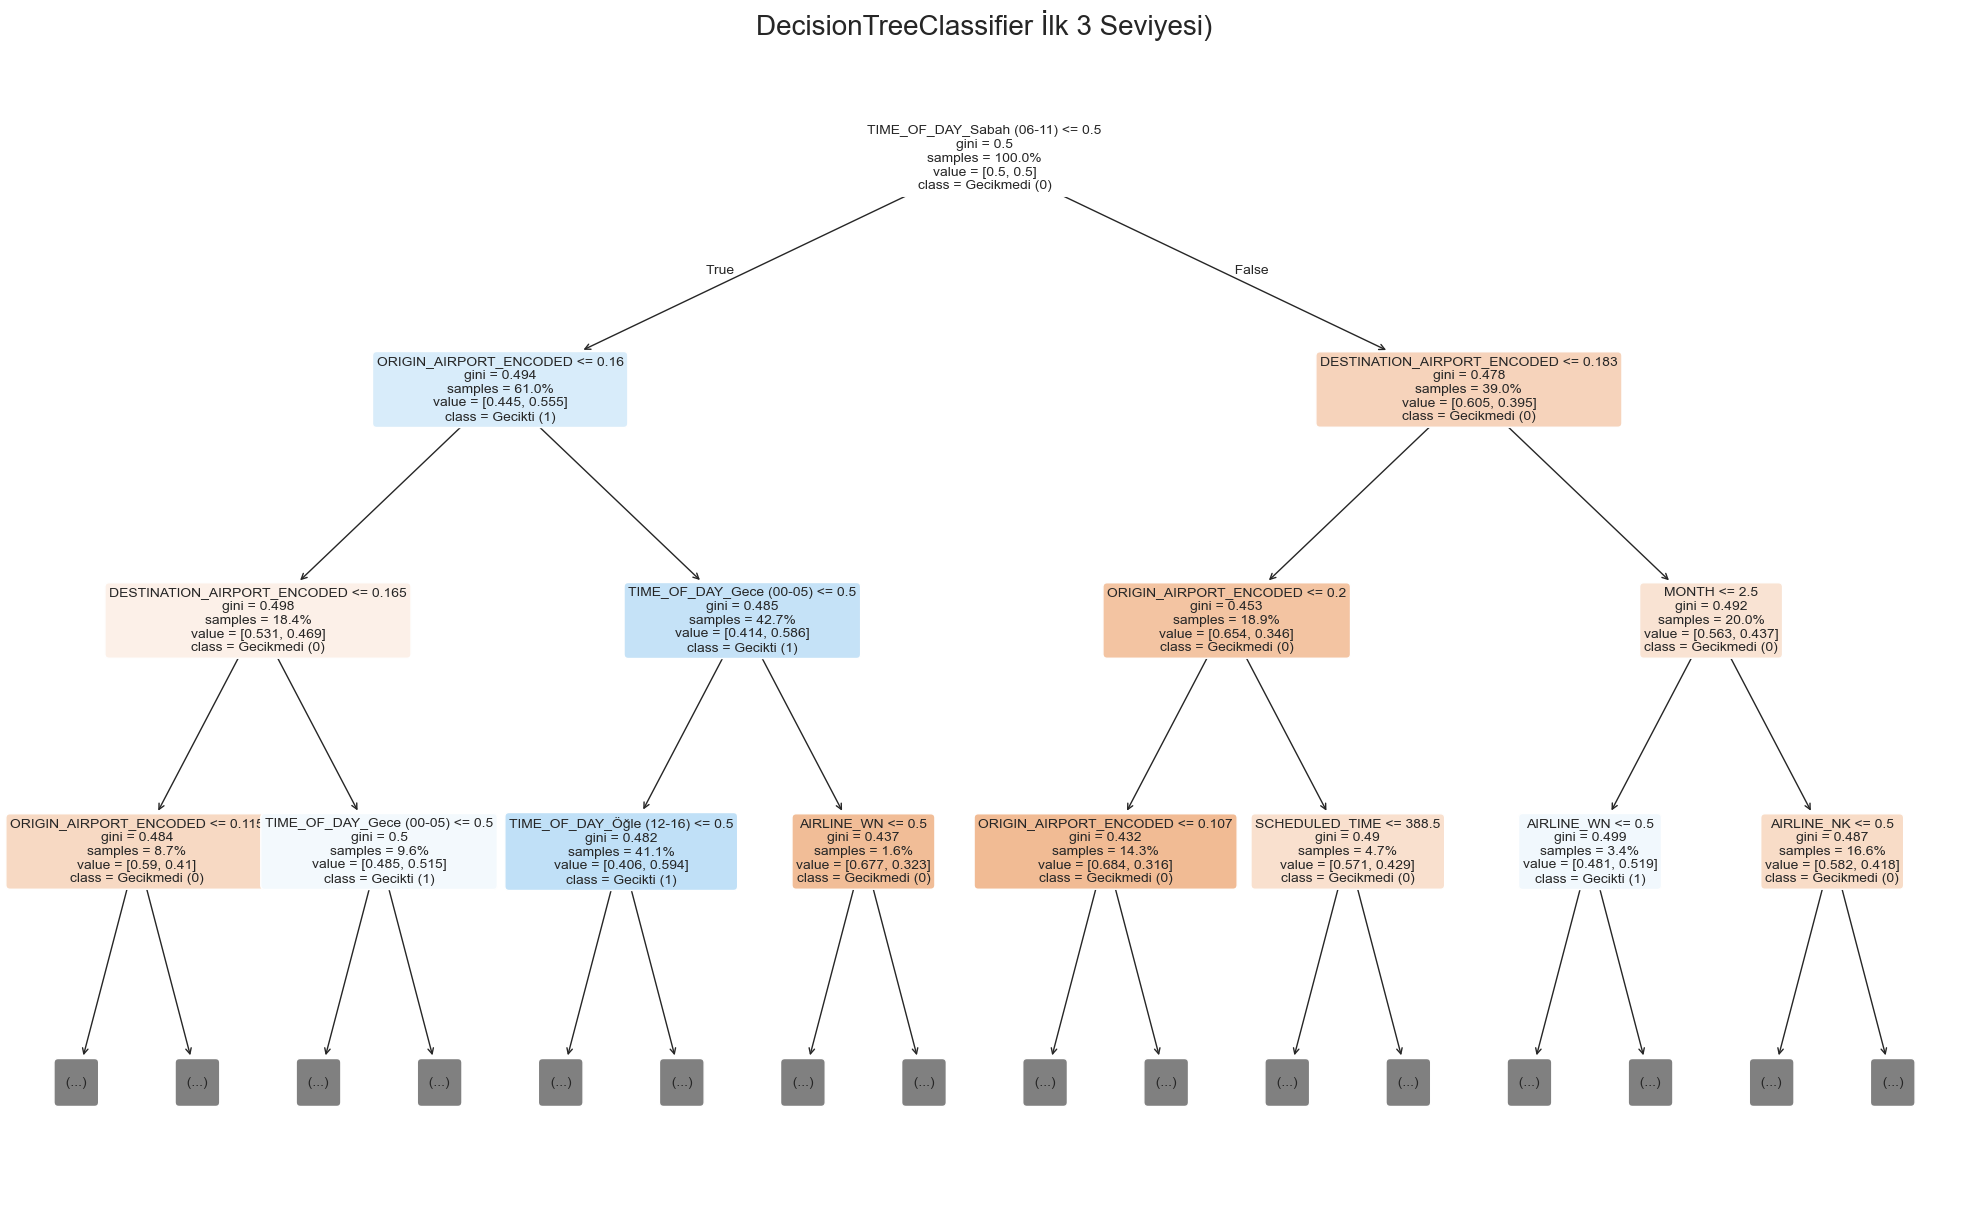

In [30]:
if 'dt_model' in locals():
    print("DecisionTreeClassifier ilk 3 seviyesinin görselleştirilmesi:")
    
    plt.figure(figsize=(25, 15)) 
    
    plot_tree(
        dt_model, 
        max_depth=3, 
        feature_names=X_train_encoded.columns,  
        class_names=['Gecikmedi (0)', 'Gecikti (1)'], 
        filled=True,  
        proportion=True, # yüzdeleri göster
        rounded=True, 
        fontsize=10
    )
    
    plt.title("DecisionTreeClassifier İlk 3 Seviyesi)", fontsize=20)
    plt.show()

else:
    print("Model bulunamadı")

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
if 'X_train_encoded' in locals():
    print(" PCA İŞLEMLERİ")

    # Özellik ölçeklendirme zorunlu.
    print("Veri ölçeklendirmesi başladı.")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    # n_components=10 26 özelliği 10 bileşene indirir

    pca = PCA(n_components=10, random_state=42)
    
    print("PCA işlemi gerçekleştiriliyor. ")
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    print(f"PCA sonrası yeni X_train boyutu: {X_train_pca.shape}")

else:
    print("Veriler bulunamadı.")

 PCA İŞLEMLERİ
Veri ölçeklendirmesi başladı.
PCA işlemi gerçekleştiriliyor. 
PCA sonrası yeni X_train boyutu: (4571137, 10)


In [32]:
if 'X_train_pca' in locals():
    
    print("DecisionTreeClassifier Modelini PCA Yapılmış Veri ile Eğitme.")
    dt_model_pca = DecisionTreeClassifier(
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )
    dt_model_pca.fit(X_train_pca, y_train)

    
    print("Sonuçlar hesaplanıyor.")
    y_pred_dt_pca = dt_model_pca.predict(X_test_pca)
    y_proba_dt_pca = dt_model_pca.predict_proba(X_test_pca)[:, 1]

    print("DecisionTreeClassifier + PCA")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_pca) * 100:.2f}%")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_dt_pca, zero_division=0))
    print(f"AUC-ROC Skoru: {roc_auc_score(y_test, y_proba_dt_pca):.4f}")

else:
    print("Veriler bulunamadı.")

DecisionTreeClassifier Modelini PCA Yapılmış Veri ile Eğitme.
Sonuçlar hesaplanıyor.
DecisionTreeClassifier + PCA
Accuracy: 60.34%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71    938225
           1       0.25      0.62      0.36    204646

    accuracy                           0.60   1142871
   macro avg       0.57      0.61      0.54   1142871
weighted avg       0.77      0.60      0.65   1142871

AUC-ROC Skoru: 0.6506


In [33]:
from sklearn.feature_selection import RFE

if 'X_train_encoded' in locals():
    print("RFE İŞLEMLERİ")
    

    dt_base_for_rfe = DecisionTreeClassifier(
        max_depth=10, 
        class_weight='balanced', 
        random_state=42
    )

    
    # n_features_to_select=10 : 26 özelliği 10 bileşene indirir
    # step=2 : Veri setimiz çok büyük olduğu için her adımda 2 özellik ekleyecek.
    rfe_selector = RFE(
        estimator=dt_base_for_rfe, 
        n_features_to_select=10, 
        step=2,
        verbose=1 
    )

    
    print("RFE işlemleri gerçekleştiriliyor.")
    rfe_selector.fit(X_train_encoded, y_train)

    
    selected_features_mask = rfe_selector.support_
    selected_feature_names_rfe = X_train_encoded.columns[selected_features_mask]
    
    print(f"RFE ile seçilen 10 özellik: {list(selected_feature_names_rfe)}")

   
    X_train_rfe = rfe_selector.transform(X_train_encoded)
    X_test_rfe = rfe_selector.transform(X_test_encoded)
    
    print(f"RFE sonrası yeni X_train boyutu: {X_train_rfe.shape}")

else:
    print("İşlemler gerçekleştirilemedi.")

RFE İŞLEMLERİ
RFE işlemleri gerçekleştiriliyor.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
RFE ile seçilen 10 özellik: ['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ENCODED', 'DESTINATION_AIRPORT_ENCODED', 'AIRLINE_DL', 'AIRLINE_WN', 'TIME_OF_DAY_Gece (00-05)', 'TIME_OF_DAY_Sabah (06-11)', 'TIME_OF_DAY_Öğle (12-16)']
RFE sonrası yeni X_train boyutu: (4571137, 10)


In [34]:
if 'X_train_rfe' in locals():
    print("DecisionTreeClassifier Modelini RFE İşlemlerinden Sonra Eğitme.")
    
    dt_model_rfe = DecisionTreeClassifier(
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )

    print("DecisionTreeClassifier modeli RFE verileriyle eğitiliyor.")
    dt_model_rfe.fit(X_train_rfe, y_train)

    
    print("Sonuçlar hesaplanıyor.")
    y_pred_dt_rfe = dt_model_rfe.predict(X_test_rfe)
    y_proba_dt_rfe = dt_model_rfe.predict_proba(X_test_rfe)[:, 1]

    print("DecisionTreeClassifier + RFE")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_rfe) * 100:.2f}%")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_dt_rfe, zero_division=0))
    print(f"AUC-ROC Skoru: {roc_auc_score(y_test, y_proba_dt_rfe):.4f}")
    
else:
    print("Veriler bulunamadı.")

DecisionTreeClassifier Modelini RFE İşlemlerinden Sonra Eğitme.
DecisionTreeClassifier modeli RFE verileriyle eğitiliyor.
Sonuçlar hesaplanıyor.
DecisionTreeClassifier + RFE
Accuracy: 61.26%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72    938225
           1       0.26      0.63      0.37    204646

    accuracy                           0.61   1142871
   macro avg       0.57      0.62      0.54   1142871
weighted avg       0.77      0.61      0.66   1142871

AUC-ROC Skoru: 0.6650


In [35]:
from sklearn.svm import LinearSVC

if 'X_train_encoded' in locals() and 'y_test' in locals():
    print("BASELINE MODEL-2  :Linear Support Vector Machine (SVM)")

   
    # dual=False: satır sayımız fazla olduğundan hızlı çalışmalasını sağlar.
    svm_model = LinearSVC(
        random_state=42, 
        dual=False, 
        class_weight='balanced'
    )

    
    print("Linear SVM modeli eğitiliyor.")
    svm_model.fit(X_train_encoded, y_train)

    
    print("Tahmin yapılıyor")
    y_pred_svm = svm_model.predict(X_test_encoded)
    
   
    y_score_svm = svm_model.decision_function(X_test_encoded)

   
    acc_svm = accuracy_score(y_test, y_pred_svm)
    auc_svm = roc_auc_score(y_test, y_score_svm)
    
    print(f"Linear SVM Model model test sonucu accuracy değeri: {acc_svm * 100:.2f}%")
    
    print("Linear SVM Model Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_svm, zero_division=0))
    
    print(f"Linear SVM AUC-ROC Skoru: {auc_svm:.4f}")

else:
    print("Veriler bulunamadı.")

BASELINE MODEL-2  :Linear Support Vector Machine (SVM)
Linear SVM modeli eğitiliyor.
Tahmin yapılıyor
Linear SVM Model model test sonucu accuracy değeri: 58.82%
Linear SVM Model Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70    938225
           1       0.24      0.62      0.35    204646

    accuracy                           0.59   1142871
   macro avg       0.56      0.60      0.52   1142871
weighted avg       0.76      0.59      0.64   1142871

Linear SVM AUC-ROC Skoru: 0.6356


In [36]:

if 'X_train_pca' in locals():

    print("Linear SVM Modelini PCA Yapılmış Veri ile Eğitme.")
    svm_pca = LinearSVC(
        random_state=42, 
        dual=False, 
        class_weight='balanced'
    )

    svm_pca.fit(X_train_pca, y_train)


    print("Sonuçlar hesaplanıyor.")
    y_pred_svm_pca = svm_pca.predict(X_test_pca)
    y_score_svm_pca = svm_pca.decision_function(X_test_pca)

 
    acc_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
    auc_svm_pca = roc_auc_score(y_test, y_score_svm_pca)

    print(f"\nLinear SVM Model + PCA Accuracy: {acc_svm_pca * 100:.2f}%")
    
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_svm_pca, zero_division=0))
    
    print(f"AUC-ROC Skoru: {auc_svm_pca:.4f}")

Linear SVM Modelini PCA Yapılmış Veri ile Eğitme.
Sonuçlar hesaplanıyor.

Linear SVM Model + PCA Accuracy: 58.10%
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69    938225
           1       0.24      0.62      0.35    204646

    accuracy                           0.58   1142871
   macro avg       0.56      0.60      0.52   1142871
weighted avg       0.76      0.58      0.63   1142871

AUC-ROC Skoru: 0.6293


In [37]:
if 'X_train_rfe' in locals():
    print("Linear SVM + RFE")

    svm_rfe = LinearSVC(
        random_state=42, 
        dual=False, 
        class_weight='balanced'
    )

    print("Linear SVM RFE'li verilerle eğitiliyor.")
    svm_rfe.fit(X_train_rfe, y_train)


    y_pred_svm_rfe = svm_rfe.predict(X_test_rfe)
    y_score_svm_rfe = svm_rfe.decision_function(X_test_rfe)

  
    acc_svm_rfe = accuracy_score(y_test, y_pred_svm_rfe)
    auc_svm_rfe = roc_auc_score(y_test, y_score_svm_rfe)

    print(f"Linear SVM + RFE Accuracy: {acc_svm_rfe * 100:.2f}%")
    
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_svm_rfe, zero_division=0))
    
    print(f"AUC-ROC Skoru: {auc_svm_rfe:.4f}")

Linear SVM + RFE
Linear SVM RFE'li verilerle eğitiliyor.
Linear SVM + RFE Accuracy: 58.59%
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.58      0.70    938225
           1       0.24      0.62      0.35    204646

    accuracy                           0.59   1142871
   macro avg       0.56      0.60      0.52   1142871
weighted avg       0.76      0.59      0.63   1142871

AUC-ROC Skoru: 0.6311


FİNAL MODEL KARŞILAŞTIRMASI
Decision Tree & SVM (Normal - PCA - RFE)
Değerlendiriliyor: Decision Tree (Normal)...
Değerlendiriliyor: Decision Tree (PCA)...
Değerlendiriliyor: Decision Tree (RFE)...
Değerlendiriliyor: Linear SVM (Normal)...
Değerlendiriliyor: Linear SVM (PCA)...
Değerlendiriliyor: Linear SVM (RFE)...
DETAYLI METRİK TABLOSU (PR AUC'ye Göre Sıralı)
                        Accuracy  F1 Score  ROC AUC  PR AUC  MAE (Hata)
Model                                                                  
Decision Tree (Normal)     60.45     36.88    66.48   30.12        0.40
Decision Tree (RFE)        61.26     36.86    66.50   30.05        0.39
Decision Tree (PCA)        60.34     35.82    65.06   27.61        0.40
Linear SVM (Normal)        58.82     35.12    63.56   26.07        0.41
Linear SVM (PCA)           58.10     34.70    62.93   25.61        0.42
Linear SVM (RFE)           58.59     34.82    63.11   25.45        0.41


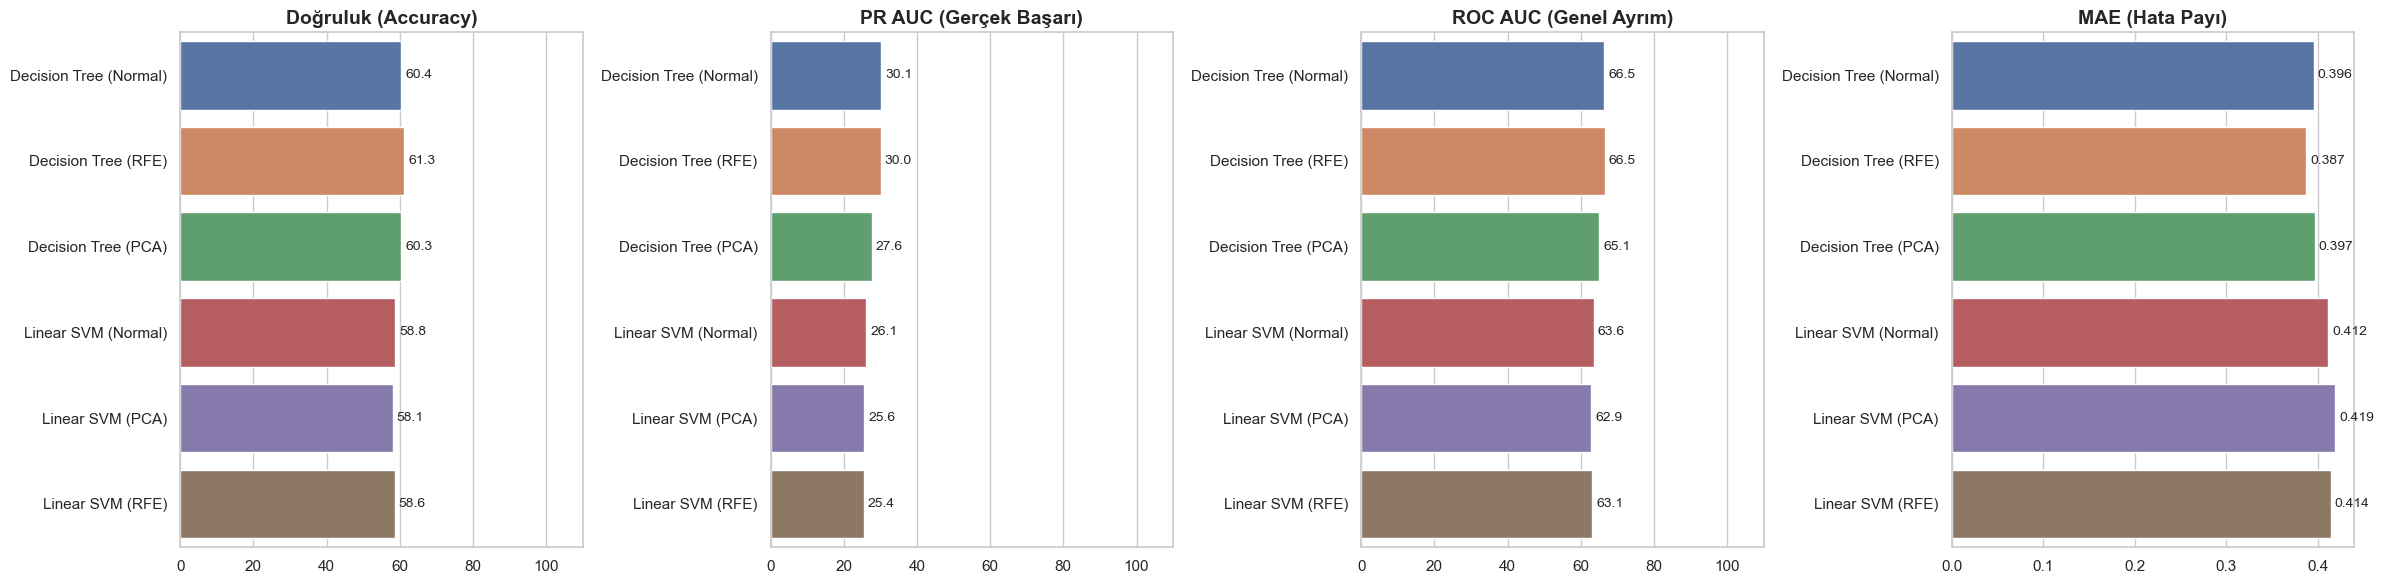

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, average_precision_score, mean_absolute_error)


sns.set(style="whitegrid")

print("FİNAL MODEL KARŞILAŞTIRMASI")
print("Decision Tree & SVM (Normal - PCA - RFE)")


models_to_evaluate = []

if 'dt_model' in locals():
    models_to_evaluate.append(('Decision Tree (Normal)', dt_model, X_test_encoded))
if 'dt_model_pca' in locals() and 'X_test_pca' in locals():
    models_to_evaluate.append(('Decision Tree (PCA)', dt_model_pca, X_test_pca))
if 'dt_model_rfe' in locals() and 'X_test_rfe' in locals():
    models_to_evaluate.append(('Decision Tree (RFE)', dt_model_rfe, X_test_rfe))


if 'svm_model' in locals():
    models_to_evaluate.append(('Linear SVM (Normal)', svm_model, X_test_encoded))
if 'svm_pca' in locals() and 'X_test_pca' in locals():
    models_to_evaluate.append(('Linear SVM (PCA)', svm_pca, X_test_pca))
if 'svm_rfe' in locals() and 'X_test_rfe' in locals():
    models_to_evaluate.append(('Linear SVM (RFE)', svm_rfe, X_test_rfe))

results = []


for name, model, X_test_data in models_to_evaluate:
    print(f"Değerlendiriliyor: {name}...")
    try:
        y_pred = model.predict(X_test_data)
        # AUC için olasılık hesapları
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_data)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test_data)
        else:
            y_score = y_pred 

        
        acc = accuracy_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred, average='binary') * 100
        mae = mean_absolute_error(y_test, y_pred) 
        roc_auc = roc_auc_score(y_test, y_score) * 100
        pr_auc = average_precision_score(y_test, y_score) * 100 

        results.append({
            "Model": name,
            "Accuracy": acc,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "MAE (Hata)": mae
        })

    except Exception as e:
        print(f"Hata ({name}): {e}")


if results:
    df_results = pd.DataFrame(results).set_index("Model").sort_values(by="PR AUC", ascending=False)
    

    print("DETAYLI METRİK TABLOSU (PR AUC'ye Göre Sıralı)")
    print(df_results.round(2))

    
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    
    plot_metrics = [
        ("Accuracy", "Doğruluk (Accuracy)", "viridis"),
        ("PR AUC", "PR AUC (Gerçek Başarı)", "magma"),
        ("ROC AUC", "ROC AUC (Genel Ayrım)", "plasma"),
        ("MAE (Hata)", "MAE (Hata Payı)", "coolwarm")
    ]
    

    df_plot = df_results.reset_index()

    for i, (metric, title, palette) in enumerate(plot_metrics):
        sns.barplot(x=metric, y="Model", data=df_plot, ax=axes[i], hue="Model", legend=False)
        axes[i].set_title(title, fontsize=14, fontweight='bold')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        
    
        if "MAE" not in metric:
            axes[i].set_xlim(0, 110)
        
       
        for container in axes[i].containers:
            fmt = '%.3f' if "MAE" in metric else '%.1f'
            axes[i].bar_label(container, fmt=fmt, padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("Model bulunamadı.")
   

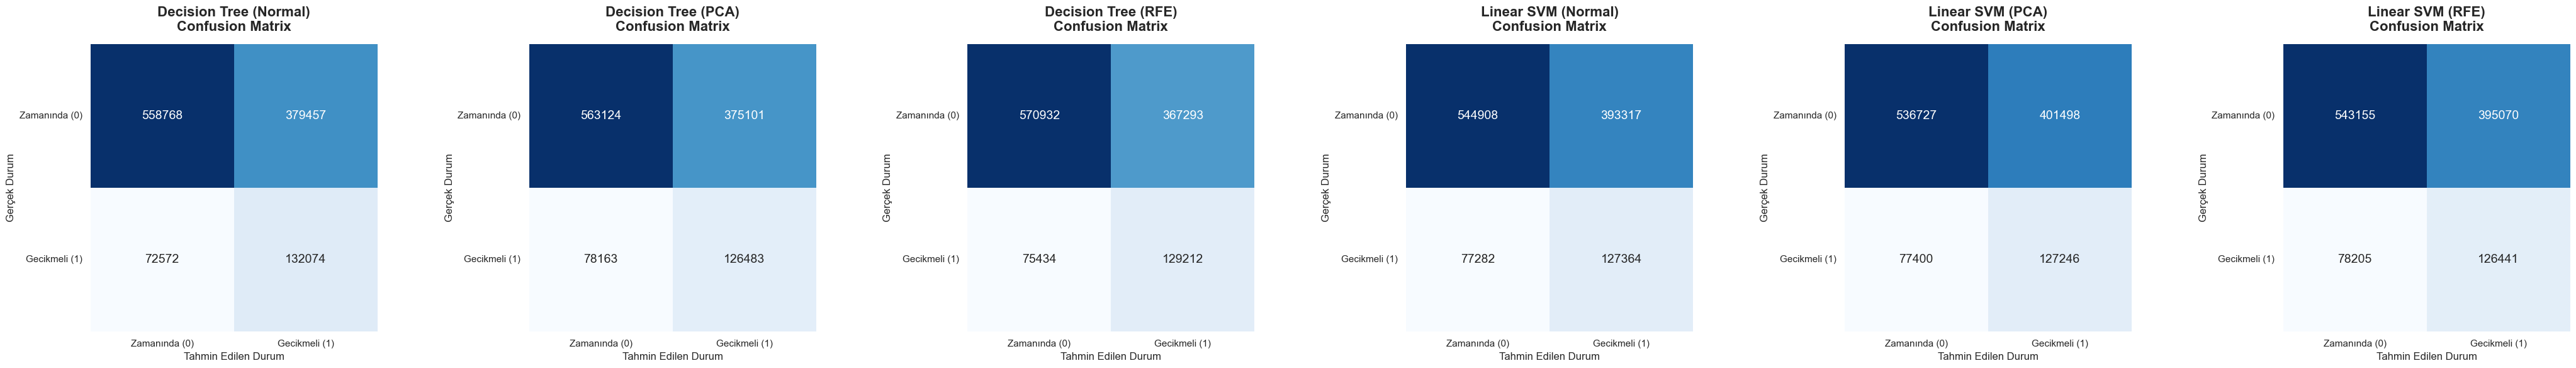

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


models = []
if 'dt_model' in locals():
    models.append(('Decision Tree (Normal)', dt_model, X_test_encoded))
if 'dt_model_pca' in locals() and 'X_test_pca' in locals():
    models.append(('Decision Tree (PCA)', dt_model_pca, X_test_pca))
if 'dt_model_rfe' in locals() and 'X_test_rfe' in locals():
    models.append(('Decision Tree (RFE)', dt_model_rfe, X_test_rfe))
if 'svm_model' in locals():
    models.append(('Linear SVM (Normal)', svm_model, X_test_encoded))
if 'svm_pca' in locals() and 'X_test_pca' in locals():
    models.append(('Linear SVM (PCA)', svm_pca, X_test_pca))
if 'svm_rfe' in locals() and 'X_test_rfe' in locals():
    models.append(('Linear SVM (RFE)', svm_rfe, X_test_rfe))

if models and 'y_test' in locals():
    fig, axes = plt.subplots(1, len(models), figsize=(7 * len(models), 6))
    if len(models) == 1:
        axes = [axes]
    for ax, (name, model, X_test_data) in zip(axes, models):
        y_pred = model.predict(X_test_data)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    ax=ax, annot_kws={"size": 14}, square=True)
        ax.set_title(f"{name}\nConfusion Matrix", fontsize=16, pad=15, fontweight='bold')
        ax.set_xlabel('Tahmin Edilen Durum', fontsize=12)
        ax.set_ylabel('Gerçek Durum', fontsize=12)
        ax.set_xticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11)
        ax.set_yticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11, rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Model veya veri bulunamadı.")

 ANA MODEL-1 :  RANDOM FOREST 
Hiperparametre ayarları yapılıyor
Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
En iyi parametrelerle RandomForest Modeli eğitiliyor...

Random Forest Model Sonuçları : 
Accuracy : 0.5972
Precision: 0.2550
Recall   : 0.6503
F1 Score : 0.3663
MAE (Hata Payı) : 0.4028
PR AUC          : 0.2964
ROC AUC         : 0.6639

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.59      0.70    938225
           1       0.26      0.65      0.37    204646

    accuracy                           0.60   1142871
   macro avg       0.57      0.62      0.54   1142871
weighted avg       0.77      0.60      0.64   1142871



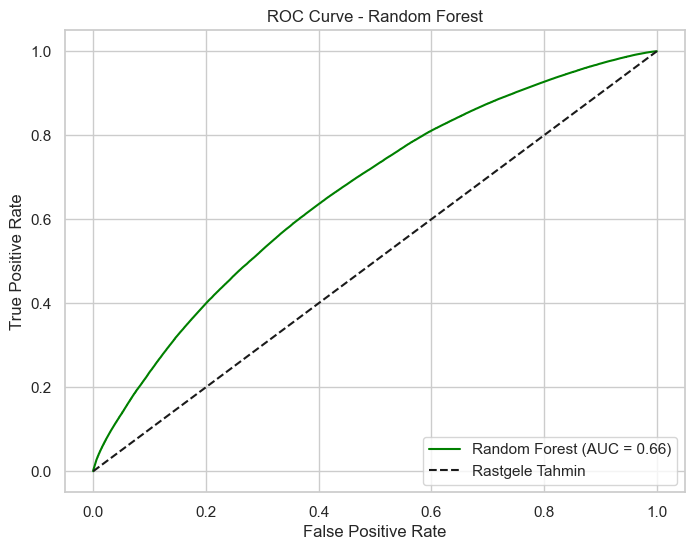

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print(" ANA MODEL-1 :  RANDOM FOREST ")

    #Hiperparametre
    rf_params = {
        'n_estimators': [50, 100, 200],        
        'max_depth': [10, 20, 30, None],       
        'min_samples_split': [2, 5, 10],       
        'min_samples_leaf': [1, 2, 4],         
        'bootstrap': [True, False]             
    }

    
    rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')

  
    print("Hiperparametre ayarları yapılıyor")
    
    rf_random = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=rf_params,
        n_iter=10, 
        cv=3, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1,
        scoring='f1' 
    )

    sample_size = 100000
    if len(X_train_encoded) > sample_size:
        X_tune = X_train_encoded[:sample_size]
        y_tune = y_train[:sample_size]
    else:
        X_tune = X_train_encoded
        y_tune = y_train

    rf_random.fit(X_tune, y_tune)

    print(f"En iyi parametreler: {rf_random.best_params_}")

    
    print("En iyi parametrelerle RandomForest Modeli eğitiliyor...")
    best_rf_model = rf_random.best_estimator_
    best_rf_model.fit(X_train_encoded, y_train)

    
    y_pred_rf = best_rf_model.predict(X_test_encoded)
    y_proba_rf = best_rf_model.predict_proba(X_test_encoded)[:, 1] 

    print("\nRandom Forest Model Sonuçları : ")
    
    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    roc_auc = roc_auc_score(y_test, y_proba_rf)
    mae = mean_absolute_error(y_test, y_pred_rf)
    pr_auc = average_precision_score(y_test, y_proba_rf)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
 
    print(f"MAE (Hata Payı) : {mae:.4f}")      
    print(f"PR AUC          : {pr_auc:.4f}")   
    print(f"ROC AUC         : {roc_auc:.4f}") 


    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_rf))

    #ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("Veriler bulunamadı.")

 ANA MODEL-1 :  RANDOM FOREST 
Hiperparametre ayarları yapılıyor
Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
En iyi parametrelerle RandomForest Modeli eğitiliyor...

Random Forest Model Sonuçları : 
Accuracy : 0.8317  
Precision: 0.6996
Recall   : 0.1052
F1 Score : 0.1828  
MAE (Hata Payı) : 0.1683
PR AUC          : 0.4390
ROC AUC         : 0.7487 

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    938225
           1       0.70      0.11      0.18    204646

    accuracy                           0.83   1142871
   macro avg       0.77      0.55      0.54   1142871
weighted avg       0.81      0.83      0.78   1142871



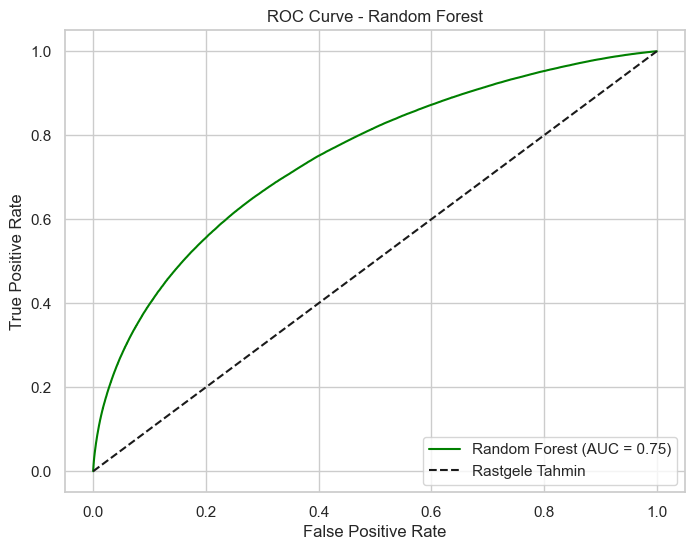

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print(" ANA MODEL-1 :  RANDOM FOREST ")

    #Hiperparametre
    rf_params = {
        'n_estimators': [100, 200, 300],       
        'max_depth': [10, 20, 30, None],       
        'min_samples_split': [2, 5, 10],       
        'min_samples_leaf': [1, 2, 4],         
        'bootstrap': [True, False]             
    }

    rf_base = RandomForestClassifier(random_state=42) 

    print("Hiperparametre ayarları yapılıyor")

    
    rf_random = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=rf_params,
        n_iter=10, 
        cv=3, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1,
        scoring='roc_auc' 
    )

    sample_size = 100000
    if len(X_train_encoded) > sample_size:
        X_tune = X_train_encoded[:sample_size]
        y_tune = y_train[:sample_size]
    else:
        X_tune = X_train_encoded
        y_tune = y_train

    rf_random.fit(X_tune, y_tune)

    print(f"En iyi parametreler: {rf_random.best_params_}")

    print("En iyi parametrelerle RandomForest Modeli eğitiliyor...")
    best_rf_model = rf_random.best_estimator_
    best_rf_model.fit(X_train_encoded, y_train)

    
    y_pred_rf = best_rf_model.predict(X_test_encoded)
    y_proba_rf = best_rf_model.predict_proba(X_test_encoded)[:, 1] 

    print("\nRandom Forest Model Sonuçları : ")
    
    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    roc_auc = roc_auc_score(y_test, y_proba_rf)
    mae = mean_absolute_error(y_test, y_pred_rf)
    pr_auc = average_precision_score(y_test, y_proba_rf)

    print(f"Accuracy : {acc:.4f}  ")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}  ")
    print(f"MAE (Hata Payı) : {mae:.4f}")      
    print(f"PR AUC          : {pr_auc:.4f}")   
    print(f"ROC AUC         : {roc_auc:.4f} ") 

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_rf))

    #ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("Veriler bulunamadı.")

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

print(" OPTİMAL EŞİK DEĞERİ ANALİZİ ")

y_proba_final = best_rf_model.predict_proba(X_test_encoded)[:, 1]

thresholds = np.arange(0.1, 0.55, 0.05)

print(f"{'Threshold':<10} {'F1 Score':<10} {'Accuracy':<10} {'Recall':<10} {'Precision':<10}")


best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_proba_final >= t).astype(int)
    
    f1_t = f1_score(y_test, y_pred_t)
    acc_t = accuracy_score(y_test, y_pred_t)
    rec_t = recall_score(y_test, y_pred_t)
    prec_t = precision_score(y_test, y_pred_t)
    
    print(f"{t:.2f}       {f1_t:.4f}     {acc_t:.4f}     {rec_t:.4f}     {prec_t:.4f}")

    if f1_t > best_f1:
        best_f1 = f1_t
        best_threshold = t


print(f"\nEN İYİ SONUÇ:")
print(f"Optimal Threshold : {best_threshold:.2f}")
print(f"Maksimum F1 Score : {best_f1:.4f}")

final_predictions = (y_proba_final >= best_threshold).astype(int)

print("\n OPTİMİZE EDİLMİŞ SINIFLANDIRMA RAPORU ")
print(classification_report(y_test, final_predictions))


 OPTİMAL EŞİK DEĞERİ ANALİZİ 
Threshold  F1 Score   Accuracy   Recall     Precision 
0.10       0.3684     0.4515     0.8936     0.2321
0.15       0.4120     0.6046     0.7736     0.2808
0.20       0.4423     0.7099     0.6423     0.3372
0.25       0.4496     0.7742     0.5150     0.3990
0.30       0.4291     0.8098     0.3992     0.4638
0.35       0.3834     0.8268     0.3007     0.5288
0.40       0.3202     0.8331     0.2196     0.5912
0.45       0.2504     0.8337     0.1551     0.6499
0.50       0.1828     0.8317     0.1052     0.6996

EN İYİ SONUÇ:
Optimal Threshold : 0.25
Maksimum F1 Score : 0.4496

 OPTİMİZE EDİLMİŞ SINIFLANDIRMA RAPORU 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    938225
           1       0.40      0.51      0.45    204646

    accuracy                           0.77   1142871
   macro avg       0.64      0.67      0.65   1142871
weighted avg       0.80      0.77      0.78   1142871



Modelde F1 skoru 0.18 olarak düşük çıkmıştır. Sebebi için eşik değeri analizi yapılmıştır. Ancak eşik değeri 0.25 e çekilince F1 değeri 0.45 e kadar yükselmekte. Ancak accuracy değerini düşürmüştür o sebeple proje hedeflerinden en az 2 tanesini sağlayan varsayılan 0.5 değeri ile devam edilmektedir.

 ANA MODEL-1 :  RANDOM FOREST (F1 arttırma operasyonu) 
Hiperparametre ayarları yapılıyor
Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
En iyi parametrelerle RandomForest Modeli eğitiliyor...

Random Forest Model Sonuçları : 
Accuracy : 0.8170  
Precision: 0.4851
Recall   : 0.3584
F1 Score : 0.4122  
MAE (Hata Payı) : 0.1830
PR AUC          : 0.4356
ROC AUC         : 0.7478 

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89    938225
           1       0.49      0.36      0.41    204646

    accuracy                           0.82   1142871
   macro avg       0.68      0.64      0.65   1142871
weighted avg       0.80      0.82      0.81   1142871



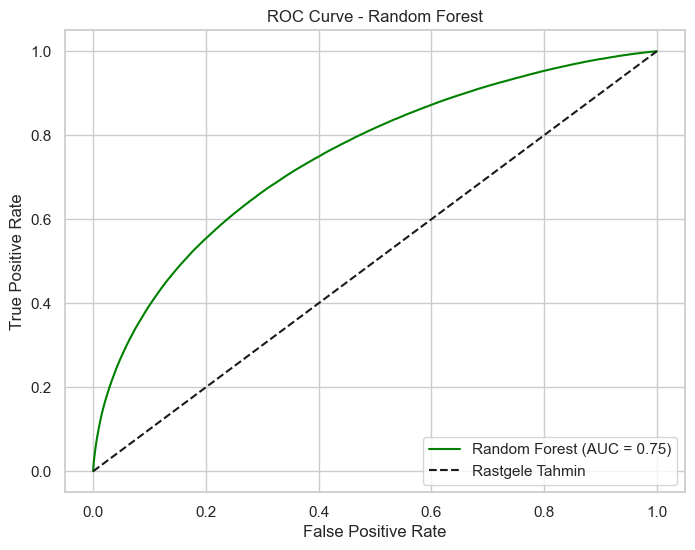

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print(" ANA MODEL-1 :  RANDOM FOREST (F1 arttırma operasyonu) ")

    rf_params = {
        'n_estimators': [100, 200, 300],       
        'max_depth': [10, 20, 30, None],       
        'min_samples_split': [2, 5, 10],       
        'min_samples_leaf': [1, 2, 4],         
        'bootstrap': [True, False]             
    }

    rf_base = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3}) 

    print("Hiperparametre ayarları yapılıyor")

    
    rf_random = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=rf_params,
        n_iter=10, 
        cv=3, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1,
        scoring='roc_auc' 
    )

    sample_size = 100000
    if len(X_train_encoded) > sample_size:
        X_tune = X_train_encoded[:sample_size]
        y_tune = y_train[:sample_size]
    else:
        X_tune = X_train_encoded
        y_tune = y_train

    rf_random.fit(X_tune, y_tune)

    print(f"En iyi parametreler: {rf_random.best_params_}")

    print("En iyi parametrelerle RandomForest Modeli eğitiliyor...")
    best_rf_model = rf_random.best_estimator_
    best_rf_model.fit(X_train_encoded, y_train)

    
    y_pred_rf = best_rf_model.predict(X_test_encoded)
    y_proba_rf = best_rf_model.predict_proba(X_test_encoded)[:, 1] 

    print("\nRandom Forest Model Sonuçları : ")
    
    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    
    roc_auc = roc_auc_score(y_test, y_proba_rf)
    mae = mean_absolute_error(y_test, y_pred_rf)
    pr_auc = average_precision_score(y_test, y_proba_rf)

    print(f"Accuracy : {acc:.4f}  ")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}  ")
    print(f"MAE (Hata Payı) : {mae:.4f}")      
    print(f"PR AUC          : {pr_auc:.4f}")   
    print(f"ROC AUC         : {roc_auc:.4f} ") 

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_rf))

    #ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("Veriler bulunamadı.")

ANA MODEL 1 - RANDOM FOREST + PCA
PCA verileriyle hiperparametre ayarları yapılıyor.
Fitting 3 folds for each of 10 candidates, totalling 30 fits
PCA için en iyi parametreler: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
PCA + Random Forest modeli eğitiliyor

 Random Forest+PCA Sonuçları
Accuracy : 0.7566
Precision: 0.3139
Recall   : 0.3030
F1 Score : 0.3084
MAE (Hata Payı) : 0.2434
PR AUC          : 0.2887
ROC AUC         : 0.6580

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85    938225
           1       0.31      0.30      0.31    204646

    accuracy                           0.76   1142871
   macro avg       0.58      0.58      0.58   1142871
weighted avg       0.75      0.76      0.75   1142871



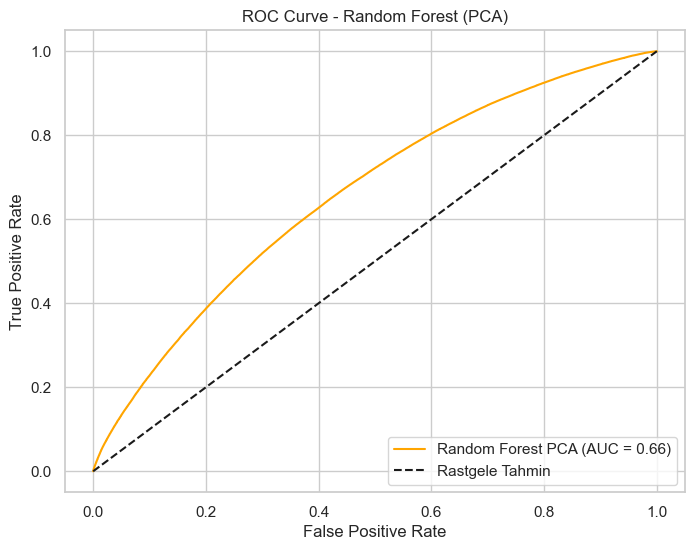

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_pca' in locals() and 'y_train' in locals():
    print("ANA MODEL 1 - RANDOM FOREST + PCA")

    rf_params = {
        'n_estimators': [100, 200, 300],       
        'max_depth': [10, 20, 30, None],       
        'min_samples_split': [2, 5, 10],       
        'min_samples_leaf': [1, 2, 4],         
        'bootstrap': [True, False]             
    }

    rf_base_pca = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3}) 

    print("PCA verileriyle hiperparametre ayarları yapılıyor.")
    
    rf_random_pca = RandomizedSearchCV(
        estimator=rf_base_pca,
        param_distributions=rf_params,
        n_iter=10, 
        cv=3, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1,
        scoring='roc_auc' 
    )

    sample_size = 100000
    if len(X_train_pca) > sample_size:
        X_tune = X_train_pca[:sample_size]
        y_tune = y_train[:sample_size]
    else:
        X_tune = X_train_pca
        y_tune = y_train

    rf_random_pca.fit(X_tune, y_tune)

    print(f"PCA için en iyi parametreler: {rf_random_pca.best_params_}")

    print("PCA + Random Forest modeli eğitiliyor")
    best_rf_pca = rf_random_pca.best_estimator_
    best_rf_pca.fit(X_train_pca, y_train)

    y_pred_pca = best_rf_pca.predict(X_test_pca)
    y_proba_pca = best_rf_pca.predict_proba(X_test_pca)[:, 1] 

    print("\n Random Forest+PCA Sonuçları")
    
    acc = accuracy_score(y_test, y_pred_pca)
    prec = precision_score(y_test, y_pred_pca)
    rec = recall_score(y_test, y_pred_pca)
    f1 = f1_score(y_test, y_pred_pca)
    
    roc_auc = roc_auc_score(y_test, y_proba_pca)
    mae = mean_absolute_error(y_test, y_pred_pca)
    pr_auc = average_precision_score(y_test, y_proba_pca)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"MAE (Hata Payı) : {mae:.4f}")      
    print(f"PR AUC          : {pr_auc:.4f}")   
    print(f"ROC AUC         : {roc_auc:.4f}") 

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_pca))

    #ROC 
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_pca)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest PCA (AUC = {roc_auc:.2f})', color='orange') 
    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest (PCA)')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("PCA verileri bulunamadı.")

ANA MODEL 2 - RANDOM FOREST + RFE
RFE verileriyle hiperparametre ayarları yapılıyor.
Fitting 3 folds for each of 10 candidates, totalling 30 fits
RFE için en iyi parametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
RFE + Random Forest modeli eğitiliyor

 Random Forest+RFE Sonuçları
Accuracy : 0.8026
Precision: 0.4446
Recall   : 0.4103
F1 Score : 0.4268
MAE (Hata Payı) : 0.1974
PR AUC          : 0.4345
ROC AUC         : 0.7348

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88    938225
           1       0.44      0.41      0.43    204646

    accuracy                           0.80   1142871
   macro avg       0.66      0.65      0.65   1142871
weighted avg       0.80      0.80      0.80   1142871



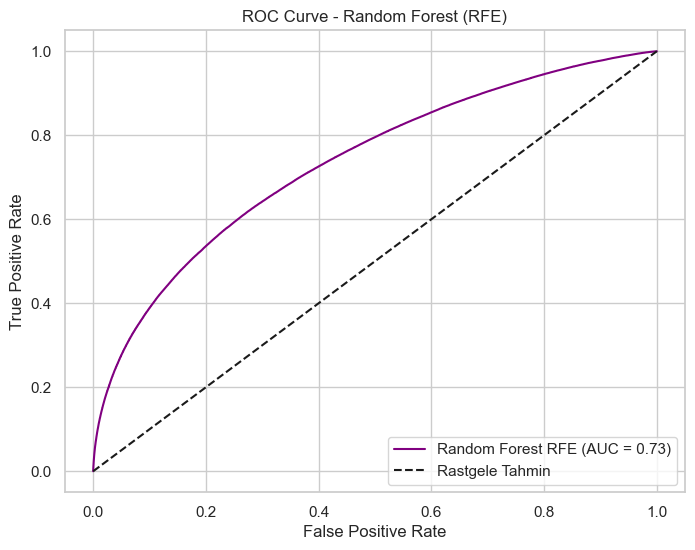

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_rfe' in locals() and 'y_train' in locals():
    print("ANA MODEL 2 - RANDOM FOREST + RFE")

    rf_params = {
        'n_estimators': [100, 200, 300],       
        'max_depth': [10, 20, 30, None],       
        'min_samples_split': [2, 5, 10],       
        'min_samples_leaf': [1, 2, 4],         
        'bootstrap': [True, False]             
    }

    rf_base_rfe = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3}) 

    print("RFE verileriyle hiperparametre ayarları yapılıyor.")
    
    rf_random_rfe = RandomizedSearchCV(
        estimator=rf_base_rfe,
        param_distributions=rf_params,
        n_iter=10, 
        cv=3, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1,
        scoring='roc_auc' 
    )

    sample_size = 100000
    if len(X_train_rfe) > sample_size:
        X_tune = X_train_rfe[:sample_size]
        y_tune = y_train[:sample_size]
    else:
        X_tune = X_train_rfe
        y_tune = y_train

    rf_random_rfe.fit(X_tune, y_tune)

    print(f"RFE için en iyi parametreler: {rf_random_rfe.best_params_}")

    print("RFE + Random Forest modeli eğitiliyor")
    best_rf_rfe = rf_random_rfe.best_estimator_
    best_rf_rfe.fit(X_train_rfe, y_train)

    y_pred_rfe = best_rf_rfe.predict(X_test_rfe)
    y_proba_rfe = best_rf_rfe.predict_proba(X_test_rfe)[:, 1] 

    print("\n Random Forest+RFE Sonuçları")
    
    acc = accuracy_score(y_test, y_pred_rfe)
    prec = precision_score(y_test, y_pred_rfe)
    rec = recall_score(y_test, y_pred_rfe)
    f1 = f1_score(y_test, y_pred_rfe)
    
    roc_auc = roc_auc_score(y_test, y_proba_rfe)
    mae = mean_absolute_error(y_test, y_pred_rfe)
    pr_auc = average_precision_score(y_test, y_proba_rfe)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"MAE (Hata Payı) : {mae:.4f}")      
    print(f"PR AUC          : {pr_auc:.4f}")   
    print(f"ROC AUC         : {roc_auc:.4f}") 

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_rfe))

    #ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfe)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest RFE (AUC = {roc_auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest (RFE)')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("RFE verileri bulunamadı.")

SINIF DAĞILIMI (PIE CHART)


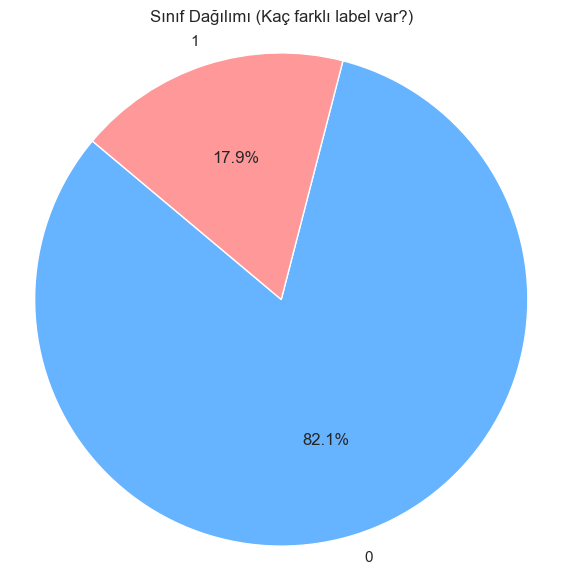

Sınıf Sayıları:
IS_DELAYED
0    3752285
1     818852
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


print("SINIF DAĞILIMI (PIE CHART)")

target_data = None
if 'y_train' in locals():
    target_data = y_train
elif 'y' in locals():
    target_data = y

if target_data is not None:
    plt.figure(figsize=(7, 7))
    counts = target_data.value_counts()
    
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
    plt.title('Sınıf Dağılımı (Kaç farklı label var?)')
    plt.axis('equal') 
    plt.show()
    
    print(f"Sınıf Sayıları:\n{counts}")
else:
    print("VERİLER BULUNAMADI.")

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
import numpy as np

print("Stratified K-Fold Uygulanıyor")


if 'best_rf_model' in locals() and 'X_train_encoded' in locals() and 'y_train' in locals():

    X_sample, _, y_sample, _ = train_test_split(
        X_train_encoded, y_train, 
        train_size=0.1,  
        stratify=y_train, 
        random_state=42
    )
    
    print(f" {len(X_sample)}  örnek veri üzerinde uygulanacak.")

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) 

    cv_scores = cross_val_score(best_rf_model, X_sample, y_sample, cv=skf, scoring='f1_weighted', n_jobs=-1) 
    

    print(f"Her Katmanın F1 Skoru : {cv_scores}")
    print(f"Ortalama F1 Skoru     : {cv_scores.mean():.4f}")

else:
    print("Model bulunamadı.")

Stratified K-Fold Uygulanıyor
 457113  örnek veri üzerinde uygulanacak.
Her Katmanın F1 Skoru : [0.77986228 0.77990206 0.77927892]
Ortalama F1 Skoru     : 0.7797


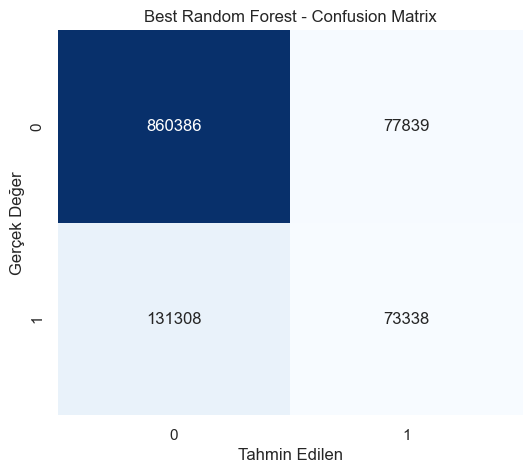

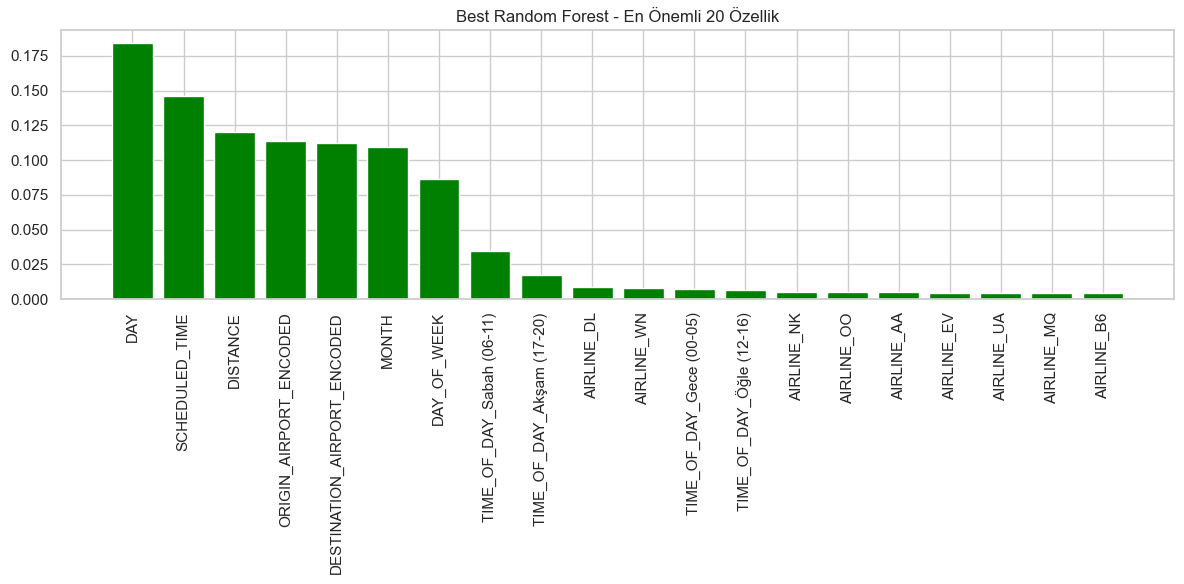

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_final = best_rf_model.predict(X_test_encoded)

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Best Random Forest - Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    
    if hasattr(X_train_encoded, 'columns'):
        feat_names = X_train_encoded.columns
    else:
        feat_names = [f"Feature {i}" for i in range(len(importances))]
        
    indices = np.argsort(importances)[::-1]
    top_n = 20 
    
    plt.figure(figsize=(12, 6))
    plt.title(f"Best Random Forest - En Önemli {top_n} Özellik")
    plt.bar(range(top_n), importances[indices][:top_n], align="center", color='green')
    plt.xticks(range(top_n), [feat_names[i] for i in indices[:top_n]], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Modelde 'feature_importances_' özelliği bulunmuyor.")